## PREDICTION CHALLENGE

In [850]:
# Functions needed for the pipeline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import graphviz # If you don't have this, install via pip/conda
%matplotlib inline
import pylab as pl
from sklearn import feature_selection
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from pmlb import fetch_data

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")

## 1. Read the data

In [533]:
def create_df (file):
    '''Creates a pandas data frame using as input 
    a .csv file
    Inputs:
    file (string): Path to file
    '''
    return pd.read_csv(file)

In [717]:
df_train = create_df('meps_train.csv')
df_test = create_df('meps_test.csv')

In [614]:
df_test.head()

,Unnamed: 0,year,serial,pernum,duid,pid,mepsid,panel,psuann,stratann,...,phq2,adinsa,adinsb,adrisk,adover,adcmpm,adcmpy,adlang,train_test,row_id
0,1,2013,1,1,20004,101,2000410117,17,1,1109,...,0,1,4,4,2,6,2013,2,test,1
1,2,2013,1,2,20004,102,2000410217,17,1,1109,...,0,1,4,4,2,6,2013,2,test,2
2,3,2013,6,5,20015,105,2001510517,17,1,1081,...,96,0,0,0,0,96,9996,0,test,3
3,4,2013,7,4,20016,104,2001610417,17,2,1162,...,96,0,0,0,0,96,9996,0,test,4
4,5,2013,8,1,20017,101,2001710117,17,2,1056,...,0,5,3,4,4,7,2013,1,test,5


## 2. Data Cleaning and feature selection

In [718]:
vars_to_exclude_apriori = ['year','Unnamed: 0', 'serial', 'pernum', 'duid', 'pid', 'panel', 'psuann', 'stratann', 
                           'psupld','stratapld','panelyr','relyr', 'famidyr','cpsfamid', 'cpsfamrefp', 'ruletr', 
                           'rusize','faminscope','famrefpyr','refprs','resp','proxy','endrfm','endrfy','keyness', 
                           'inscop','inscop1231','inscopev','elig1231','saqelig','hieu','relate','hispeth', 
                           'intervlang', 'ftotincmeps', 'othlangfam','othlangspan','eduyrdg','edrecode','edrecode','hideg','ftotinccps',
                           'incwage','incbus','incunemp', 'incunemp','incwkcom','incint',
                            'incdivid','incprop','incretir','incss','inctrst','incvet','incira','incalim','incchld',
                           'inccash','incssi','incwelfr', 'incoth','foodstyn','povlev','povcatcps','povcatmeps', 
                           'filedyn','filewill',
 'fileprim',
 'filejoint',
 'file2pid',
 'filedepyn',
 'fileisdep',
 'filedephere',
 'filenodepaway',
 'filetaxfrm',
 'filehideduct',
 'fileeitc',
'typplsick',
'insjax',
 'insfex',
 'insmax',
 'insapx',
 'insmyx',
 'insjux',
 'insjlx',
 'insaux',
 'inssex',
 'insocx',
 'insnox',
 'insdex',
'mamm',
 'maja',
 'mafe',
 'mama',
 'maap',
 'mamy',
 'maju',
 'majl',
 'maau',
 'mase',
 'maoc',
 'mano',
 'made',
 'mammx',
 'majax', 'mafex',
 'mamax',
 'maapx',
 'mamyx',
 'majux',
 'majlx',
 'maaux',
 'masex',
 'maocx',
 'manox',
 'madex',
 'mcmm',
 'mcja',
 'mcfe',
 'mcma',
 'mcap',
 'mcmy',
 'mcju',
 'mcjl',
 'mcau',
 'mcse',
 'mcoc',
 'mcno',
 'mcde',
 'mcmmx',
 'mcjax',
 'mcfex',
 'mcmax',
 'mcapx',
 'mcmyx',
 'mcjux',
 'mcjlx',
 'mcaux',
 'mcsex',
 'mcocx',
 'mcnox',
 'mcdex','primm',
 'prija',
 'prife',
 'prima',
 'priap',
 'primy',
 'priju',
 'prijl',
 'priau',
 'prise',
 'prioc',
 'prino',
 'pride','pubmmx',
 'pubjax',
 'pubfex',
 'pubmax',
 'pubapx',
 'pubmyx',
 'pubjux',
 'pubjlx',
 'pubaux',
 'pubsex',
 'pubocx',
 'pubnox','pubdex',
 'pegmm',
 'pegja',
 'pegfe',
 'pegma',
 'pegap',
 'pegmy',
 'pegju',
 'pegjl',
 'pegau',
 'pegse',
 'pegoc',
 'pegno',
 'pegde',
 'prsmm',
 'prsja',
 'prsfe',
 'prsma',
 'prsap',
 'prsmy',
 'prsju',
 'prsjl',
 'prsau',
 'prsse',
 'prsoc',
 'prsno',
 'prsde',
 'pogmm',
 'pogja',
 'pogfe',
 'pogma',
 'pogap',
 'pogmy',
 'pogju',
 'pogjl',
 'pogau',
 'pogse',
 'pogoc',
 'pogno',
 'pogde',
 'pngmm',
 'pngja',
 'pngfe',
 'pngma',
 'pngap',
 'pngmy',
 'pngju',
 'pngjl',
 'pngau',
 'pngse',
 'pngoc',
 'pngno',
 'pngde',
 'poumm',
 'pouja',
 'poufe',
 'pouma',
 'pouap',
 'poumy',
 'pouju',
 'poujl',
 'pouau',
 'pouse',
 'pouoc',
 'pouno',
 'poude',
 'prxmm',
 'prxja',
 'prxfe',
 'prxma',
 'prxap',
 'prxmy',
 'prxju',
 'prxjl',
 'prxau',
 'prxse',
 'prxoc',
 'prxno',
 'prxde',
 'pdkmm',
 'pdkja',
 'pdkfe',
 'pdkma',
 'pdkap',
 'pdkmy',
 'pdkju',
 'pdkjl',
 'pdkau',
 'pdkse',
 'pdkoc',
 'pdkno',
 'pdkde',
 'hprmm',
 'hprja',
 'hprfe',
 'hprma',
 'hprap',
 'hprmy',
 'hprju',
 'hprjl',
 'hprau',
 'hprse',
 'hproc',
 'hprno',
 'hprde',
 'hpemm',
 'hpeja',
 'hpefe',
 'hpema',
 'hpeap',
 'hpemy',
 'hpeju',
 'hpejl',
 'hpeau',
 'hpese',
 'hpeoc',
 'hpeno',
 'hpede',
 'hpsmm',
 'hpsja',
 'hpsfe',
 'hpsma',
 'hpsap',
 'hpsmy',
 'hpsju',
 'hpsjl',
 'hpsau',
 'hpsse',
 'hpsoc',
 'hpsno',
 'hpsde',
 'hpomm',
 'hpoja',
 'hpofe',
 'hpoma',
 'hpoap',
 'hpomy',
 'hpoju',
 'hpojl',
 'hpoau',
 'hpose',
 'hpooc',
 'hpono',
 'hpode',
 'hpnmm',
 'hpnja',
 'hpnfe',
 'hpnma',
 'hpnap',
 'hpnmy',
 'hpnju',
 'hpnjl',
 'hpnau',
 'hpnse',
 'hpnoc',
 'hpnno',
 'hpnde',
 'hpxmm',
 'hpxja',
 'hpxfe',
 'hpxma',
 'hpxap',
 'hpxmy',
 'hpxju',
 'hpxjl',
 'hpxau',
 'hpxse',
 'hpxoc',
 'hpxno',
 'hpxde',
 'hpdmm',
 'hpdja',
 'hpdfe',
 'hpdma',
 'hpdap',
 'hpdmy',
 'hpdju',
 'hpdjl',
 'hpdau',
 'hpdse',
 'hpdoc',
 'hpdno',
 'hpdde',
 'stamm',
 'staja',
 'stafe',
 'stama',
 'staap',
 'stamy',
 'staju',
 'stajl',
 'staau',
 'stase',
 'staoc',
 'stano',
 'stade',
 'trimmx',
 'trijax',
 'trifex',
 'trimax',
 'triapx',
 'trimyx',
 'trijux',
 'trijlx',
 'triaux',
 'trisex',
 'triocx',
 'trinox',
 'tridex',
 'opamm',
 'opaja',
 'opafe',
 'opama',
 'opaap',
 'opamy',
 'opaju',
 'opajl',
 'opaau',
 'opase',
 'opaoc',
 'opano',
 'opade',
 'opbmm',
 'opbja',
 'opbfe',
 'opbma',
 'opbap',
 'opbmy',
 'opbju',
 'opbjl',
 'opbau',
 'opbse',
 'opboc',
 'opbno',
 'opbde',
 'adprxy', 'perweight', 'saqweight', 'diabweight', 'cpsfamsize', 'ruclas', 'birthmo','birthyr', 'othlangwell',]
#ojo con los de ingreso FTOTVAL

In [719]:
df_train.drop(vars_to_exclude_apriori, axis=1, inplace=True)
#df_test.drop(vars_to_exclude_apriori, axis=1, inplace=True)


In [695]:
#(df_train.columns.values.tolist())

In [622]:
#df_train = df_train.rename(columns={'famsze': 'family_size', 'ftotval': 'total_fam_income'})

In [ ]:
to later_delete = ['racea',
 'yrsinus',
 'hispyn','usborn', 'educ',
 'educyr',
 'student',
 'workev',
 'inctot', 'inctot',
 'cpi2009', 'povcat',
 'filestatus',
 'health',
 'accesselig',
 'usualpl',
 'nouslydkwher',
 'nouslydrmov',
 'nouslyfar',
 'nouslylang',
 'nouslynolike', 'nouslynoneed',
 'nouslyoth',
 'uscmedtyp',
 'uscprtyp',
 'uscprfac',
 'uscprnew',
 'uscprongng',
 'uscprprev',
 'uscprrefrl',
 'uscprasn',
 'uscprblk',
 'uscprhisp',
 'uscprnatam',
 'uscpropi', 'uscprothrac',
 'uscprwht',
 'uscprsex',
 'usctrvltim',
 'uschowdfclt',
 'uscprdiftel',
 'uscprafthrs',
 'uscprngtwkd',
 'uscprlang',
 'uscprchoice',
 'uscprexpln',
 'uscprothcare',
 'uscprrspct',
 'whynouslpl',
 'nouslyer', 'nouslydiff',
 'nouslydr',
 'nouslyexp',
 'nouslyfrfam',
 'nouslyhlth',
 'nouslyinchg',
 'nouslyinrsn',
 'nouslyjob',
 'nouslymove',
 'nouslynoins',
 'nouslynone',
 'nouslyrefdr',
 'nouslyself',
 'nouslytrans',
 'nouslywork',
 'delaymc', 'delaymcpb',
 'delaydt',
 'delaydty',
 'delaydtpb',
 'delayrx',
 'delayrxy',
 'delayrxpb',
 'unmtndmc',
 'unmtndmcpb',
 'unmtndmcy',
 'unmtnddt',
 'unmtnddtpb',
 'unmtnddty',
 'unmtndrx',
 'unmtndrxy',
 'unmtndrxpb','hiprivate',
 'hichampany',
 'himachip',
 'himcare',
 'hiothgova',
 'hiothgovb',
 'insmmx',
 'dvtotvis',
 'dvgtotvis',
 'dvototvis',
 'mdsmqadv',
 'anylmt',
 'addev',
 'angipecev',
 'arthglupev',
 'asthmaev',
 'cancerev',
 'cheartdiev', 'cholhighev',
 'diabeticev',
 'emphysemev',
 'heartattev',
 'heartconev',
 'hypertenev',
 'strokeage',
 'strokev',
 'hypertenage',
 'cheartdiage',
 'angipecage',
 'heartattage',
 'heartconage',
 'emphysemage',
 'cholhighage',
 'arthgluptype',
 'arthglupage',
 'asthmaage',
 'addage',
 'cnblad',
 'cnbres', 'cncerv',
 'cncoln',
 'cnlung',
 'cnlymp',
 'cnmeln',
 'cnothr',
 'cnpros',
 'cnskdk',
 'cnsknm',
 'cnuter',
 'diabeticage',
 'hyp2time',
 'smokenow',
 'aeffort',
 'ahopeless',
 'anervous',
 'arestless',]

In [696]:
#(df_train.columns.values.tolist())

In [720]:
def merge_dummies(df, dummydf):
    '''merge dataframe and dummy dataframe with dummy vars
    output:df'''
    a = df.merge(dummydf, left_index = True, right_index=True)
    return a

def create_dummiesdf(df, variable):
    '''creates a new variable with dummy variables from a categorical or numerical
    value'''
    df_dummy = pd.get_dummies(df[variable], drop_first=True)
    return df_dummy

def recode_categorical (dataframe, oldvariable, newvariable, dictionary):
    '''recodes to a categorical variable'''
    dataframe[newvariable] = dataframe[oldvariable].map(dictionary)
    
def dum_recode(dataframe, oldvariable, newvariable, dictionary):
    '''recodes the dataframe and adds a set of dummy variables'''
    dataframe[newvariable] = dataframe[oldvariable].map(dictionary)
    dum = create_dummiesdf(dataframe,newvariable)
    a = merge_dummies(dataframe,dum)
    return a

In [722]:
def recode_race(c):
    if (c['racea'] >= 900):
        return 'unknown_race'
    elif c['racea'] == 600:
        return 'mutiple_race'
    elif 500 <= c['racea'] < 600:
        return 'other_race'
    elif 400 <=c['racea'] < 500:
        return 'asian'
    elif 300<c['racea'] < 400:
        return 'native_american'
    elif c['racea'] == 200: 
        return 'black'
    elif c['racea'] == 100: 
        return 'white'
    else:
        return 'multiple'
def recode_hispanic(c):
    if (c['hispyn'] ==2):
        return 'hispanic'
    elif c['hispyn'] == 1:
        return 'not_hispanic'
    else:
        return 'dn_hispanic'
def recode_school(c):
    if (c['educyr'] <= 8):
        return 'school_lessg8'
    elif 9 <= c['educyr'] <= 12:
        return 'school_grades912'
    elif 13 <=c['educyr'] < 17:
        return '1_4college'
    elif c['racea'] >= 96:
        return 'dn_educ'
    elif c['educyr'] == 17: 
        return 'morethan5yrscoll'

def recode_student(c):
    if (c['student'] == 3):
        return 'not_student'
    elif 1 <= c['educyr'] <= 2:
        return 'is_student'
    else:
        return 'dn_student'

def recode_usborn(c):
    if (c['usborn'] == 20):
        return 'usborn'
    else:
        return 'not_us_born'

def recode_poor(c):
    if (c['povcat'] <= 2):
        return 'is_poor'
    else:
        return 'not_poor'   
def recode_health(c):
    if (c['health'] == 1 | c['health'] == 2| c['health'] == 3):
        return 'good_health'
    else:
        return 'bad_health'
def recode_usual_place(c):
    if (c['usualpl'] ==1):
        return 'usualpl_n'
    elif c['usualpl'] == 2:
        return 'usual_pl_y'
    elif c['usualpl'] == 3:
        return 'usual_pl_many'
    else:
        return 'usual_pl_dn'
def recode_provider(c):
    if (c['uscprtyp'] <200):
        return 'type_1prov'
    elif 200<= c['uscprtyp']<300:
        return 'type_2prov'
    elif 300<= c['uscprtyp']<400:
        return 'type_3prov'
    elif 400<= c['uscprtyp']<500:
        return 'type_4prov'    
    elif 500<= c['uscprtyp']<900:
        return 'type_5prov'    
    else:
        return 'type_6prov'    
    
def recode_generic(c, var):
    if (c[var] ==2):
        return var + "_Y"
    elif c[var] == 1:
        return var +"_N"
    else:
        return var + "_other_answ"

def recode_generic123(c, var):
    if (c[var] ==2):
        return var + "answ2"
    elif c[var] == 1:
        return var +"answ1"
    elif c[var] == 3:
        return var +"answ3"   
    else:
        return var + "_other_answ"
def recode_generic1234(c, var):
    if (c[var] ==2):
        return var + "answ2"
    elif c[var] == 1:
        return var +"answ1"
    elif c[var] == 3:
        return var +"answ3"
    elif c[var] == 4:
        return var +"answ4"
    else:
        return var + "_other_answ"

def recode_travel_time(c):    
    
    if (c['usctrvltim'] ==1):
        return "15min"
    elif (c['usctrvltim'] ==2):
        return "1530min"
    elif (c['usctrvltim'] ==3):
        return "3060min"
    elif (c['usctrvltim'] ==4):
        return "6090min"
    elif (c['usctrvltim'] ==5):
        return "90120min"
    elif (c['usctrvltim'] ==6):
        return "more120min"   
    else:
        return "other_answ"


In [723]:
##SEX##
recode_sex = {2: 'male', 1: 'female'}
df_train = dum_recode(df_train,'sex','sexcateg',recode_sex) 
print('sex recoded')

sex recoded


In [724]:
##MARRIAGE##
recode_marriage = {99: 'Unknownmarstat',
50:        'Never married',
40:        'Separated',
30:        'Divorced',
20:        'Widowed',
13:        'Married', 
12:        'Married',
11:        'Married',
10:        'Married',
0:       'NIU_married'} 
df_train = dum_recode(df_train,'marstat','marital_st',recode_marriage)
df_train=merge_dummies(df_train,create_dummiesdf(df_train, 'marital_st'))

print('marriage recoded')

marriage recoded


In [725]:
##RACE ##
df_train['race_recoded'] = df_train.apply(recode_race, axis=1)
df_train=merge_dummies(df_train,create_dummiesdf(df_train, 'race_recoded'))
df_train['hispanic_recoded'] = df_train.apply(recode_hispanic, axis=1)
df_train=merge_dummies(df_train,create_dummiesdf(df_train, 'hispanic_recoded'))
print('race recoded')

race recoded


In [726]:
##SCHOOL##
df_train['school_recoded'] = df_train.apply(recode_school, axis=1)
df_train=merge_dummies(df_train,create_dummiesdf(df_train, 'school_recoded'))
print('school recoded')

school recoded


In [727]:
##STUDENT##
df_train['student_recoded'] = df_train.apply(recode_student, axis=1)
df_train=merge_dummies(df_train,create_dummiesdf(df_train, 'student_recoded'))
print("student recoded")

student recoded


In [728]:
## HAS WORKED ##
recode_has_worked = {2: 'has_worked', 1: 'has_not_worked', 7:'unk_work',8:'unk_work',9:'unk_work',0:'unk_work'}
df_train = dum_recode(df_train,'workev','has_worked',recode_has_worked) 
print('hasworked recoded')

hasworked recoded


In [729]:
## US BORN ##
df_train['usborn_recoded'] = df_train.apply(recode_usborn, axis=1)
df_train = merge_dummies(df_train,create_dummiesdf(df_train, 'usborn_recoded'))
print("us born recoded")

us born recoded


In [730]:
#POOR#
df_train['poor_recoded'] = df_train.apply(recode_poor, axis=1)
df_train = merge_dummies(df_train,create_dummiesdf(df_train, 'poor_recoded'))
print("poor recoded")

poor recoded


In [731]:
##TAXES##
recode_taxfile = {
0:        'tax_no_info',
1:        'tax_ingle',
2:        'tax_married_joint',
3:        'tax_married_separately',
4:        'tax_head',
5:        'tax_widower_dep',
7:        'tax_no_info',
8:        'tax_no_info',
9:        'tax_no_info'}
df_train = dum_recode(df_train,'filestatus','file_tax',recode_taxfile)
print("taxes recoded")

taxes recoded


In [732]:
## health ##
df_train['health_recoded'] = df_train.apply(recode_health, axis=1)
df_train = merge_dummies(df_train,create_dummiesdf(df_train, 'health_recoded'))
print('health recoded')

health recoded


In [733]:
#"USUAL PLACE"#
df_train['usual_place'] = df_train.apply(recode_usual_place, axis=1)
df_train = merge_dummies(df_train,create_dummiesdf(df_train, 'usual_place'))
print("usual place recoded")

usual place recoded


In [734]:
## SEVERAL VARS ACCESS TO CARE ## 1-2 scale yes no
variables = ["NOUSLYDKWHER", "NOUSLYDRMOV", "NOUSLYFAR", "NOUSLYLANG", "NOUSLYNOLIKE", "NOUSLYNONEED",
             "NOUSLYOTH", "USCPRNEW", "USCPRONGNG", "USCPRPREV", "USCPRREFRL", "USCPRASN", "USCPRBLK", "USCPRHISP",
            "USCPRNATAM", "USCPROPI", "USCPROTHRAC", "USCPRSEX", "USCPRNGTWKD", "USCPRLANG", "USCPREXPLN", "NOUSLYER",
            "NOUSLYDIFF", "NOUSLYDR", "NOUSLYEXP", "NOUSLYFRFAM", "NOUSLYHLTH", "NOUSLYINCHG", "NOUSLYINRSN", "NOUSLYJOB",
            "NOUSLYMOVE", "NOUSLYNOINS", "NOUSLYNONE", "NOUSLYREFDR", "NOUSLYSELF", "NOUSLYTRANS", "NOUSLYWORK", "DELAYMC",
            "DELAYDT", "DELAYRX", "UNMTNDMC", "UNMTNDRX", "HIPRIVATE", "HICHAMPANY", "HIMACHIP", "HIMCARE", "HIOTHGOVA",
            "HIOTHGOVB", "MDSMQADV", "ANYLMT", "ANGIPECEV", "ARTHGLUPEV", "CANCEREV", "CHEARTDIEV", "CHOLHIGHEV","DIABETICEV",
            "EMPHYSEMEV","HEARTATTEV", "HEARTCONEV", "HYPERTENEV", "STROKEV", "CNBLAD", "CNBRES", "CNCERV", "CNCOLN",
            "CNLUNG", "CNLYMP", "CNMELN", "CNOTHR", "CNPROS", "CNSKDK","CNSKNM", "CNUTER", "HYP2TIME", "SMOKENOW",
             "ADILCR", "ADILWW", "ADRTCR", "ADDRBP", "ADSPEC", 'accesselig']
for vari in variables:
    vari=str.lower(vari)
    new_var= vari+"_"+"recod"
    print(new_var)
    df_train[new_var] = df_train.apply(recode_generic, var = vari, axis=1 )
    df_train = merge_dummies(df_train,create_dummiesdf(df_train, new_var))
    df_test.drop([vari], axis=1, inplace=True)


nouslydkwher_recod
nouslydrmov_recod
nouslyfar_recod
nouslylang_recod
nouslynolike_recod
nouslynoneed_recod
nouslyoth_recod
uscprnew_recod
uscprongng_recod
uscprprev_recod
uscprrefrl_recod
uscprasn_recod
uscprblk_recod
uscprhisp_recod
uscprnatam_recod
uscpropi_recod
uscprothrac_recod
uscprsex_recod
uscprngtwkd_recod
uscprlang_recod
uscprexpln_recod
nouslyer_recod
nouslydiff_recod
nouslydr_recod
nouslyexp_recod
nouslyfrfam_recod
nouslyhlth_recod
nouslyinchg_recod
nouslyinrsn_recod
nouslyjob_recod
nouslymove_recod
nouslynoins_recod
nouslynone_recod
nouslyrefdr_recod
nouslyself_recod
nouslytrans_recod
nouslywork_recod
delaymc_recod
delaydt_recod
delayrx_recod
unmtndmc_recod
unmtndrx_recod
hiprivate_recod
hichampany_recod
himachip_recod
himcare_recod
hiothgova_recod
hiothgovb_recod
mdsmqadv_recod
anylmt_recod
angipecev_recod
arthglupev_recod
cancerev_recod
cheartdiev_recod
cholhighev_recod
diabeticev_recod
emphysemev_recod
heartattev_recod
heartconev_recod
hypertenev_recod
strokev_recod
cn

In [735]:
#PRovider#
df_train['provider'] = df_train.apply(recode_provider, axis=1)
df_train = merge_dummies(df_train,create_dummiesdf(df_train, 'provider'))
print("provider recoded")

provider recoded


In [736]:
#   1-2-3 scale #
variables = ["USCPRFAC", 'DELAYMCPB', "DELAYDTPB", "DELAYRXPB", "UNMTNDMCPB", "UNMTNDDTPB", "UNMTNDRXPB", "ADDAYA",
            "ADCLIM",  "ADPALS", "ADPWLM", "ADMALS", "ADMWLM", "ADPAIN", "ADCAPE", "ADNRGY", "ADDOWN", "ADSOCA",
            "ADINTR", "ADDPRS"]
for vari in variables:
    vari=str.lower(vari)
    new_var= vari+"_"+"recod"
    print(new_var)
    df_train[new_var] = df_train.apply(recode_generic123, var = vari, axis=1 )
    df_train = merge_dummies(df_train,create_dummiesdf(df_train, new_var))
    df_train.drop(vari, axis=1, inplace=True)


uscprfac_recod
delaymcpb_recod
delaydtpb_recod
delayrxpb_recod
unmtndmcpb_recod
unmtnddtpb_recod
unmtndrxpb_recod
addaya_recod
adclim_recod
adpals_recod
adpwlm_recod
admals_recod
admwlm_recod
adpain_recod
adcape_recod
adnrgy_recod
addown_recod
adsoca_recod
adintr_recod
addprs_recod


In [737]:
#"TRAVEL TIME"#
df_train['travel_time'] = df_train.apply(recode_travel_time, axis=1)
df_train = merge_dummies(df_train,create_dummiesdf(df_train, 'travel_time'))
print("Travel time recoded")

Travel time recoded


In [738]:
#1-2-3-4 scale
variables = ["USCHOWDFCLT","USCPRDIFTEL", "USCPRAFTHRS", "USCPRCHOICE", "USCPRRSPCT", "ADEGMC", "ADLIST", "ADEXPL",
            "ADPRTM", "ADEZUN", "ADESSP"]
for vari in variables:
    vari=str.lower(vari)
    new_var= vari+"_"+"recod"
    print(new_var)
    df_train[new_var] = df_train.apply(recode_generic1234, var = vari, axis=1 )
    df_train = merge_dummies(df_train,create_dummiesdf(df_train, new_var))
    df_train.drop([vari], axis=1, inplace=True)

uschowdfclt_recod
uscprdiftel_recod
uscprafthrs_recod
uscprchoice_recod
uscprrspct_recod
adegmc_recod
adlist_recod
adexpl_recod
adprtm_recod
adezun_recod
adessp_recod


In [739]:
##DELAY ##
recode_delay = {0:        "na",
1:        'not_afford',
2:        'insurance',
3:        'doctor',
4:        'problems',
5:        'lamguage',
6:        'work',
7:        'knowledge',
8:        'refused',
9:        'childcate',
10:        'time',
11:        'other',
97:        'na',
98:        'na',
99:        'na'}
variables = ['delaymcy','delaydty', 'delayrxy', 'unmtndmcy', 'unmtnddty', 'unmtndrxy']
i=i
for vari in variables:
    df_train = dum_recode(df_train,vari,(var+'delay'+str(i)),recode_delay)
    i=i+1
    df_train.drop([vari], axis=1, inplace=True)


In [740]:
##REGION ##
df_train = merge_dummies(df_train,create_dummiesdf(df_train, 'regionmeps'))


In [742]:
#Strokeage#
def recode_strokeage(c):     
    if (c['strokeage'] ==0 | c['strokeage'] >97  ):
        return np.nan 
    else:
        return c['strokeage']
df_train['strokeage_recoded'] = df_train.apply(recode_strokeage, axis=1)
impute(df_train, ['strokeage_recoded'])

In [743]:
#diabetes age#
def recode_diabetesage(c):     
    if (c['diabeticage'] >93  ):
        return 0 
    else:
        return c['diabeticage']
df_train['diabetes_age_recoded'] = df_train.apply(recode_diabetesage, axis=1)
#impute(df_train, ['strokeage_recoded'])

In [746]:
##LIKERT SCALE
def recode_likert(c, var):     
    if (c[var] >5 | c[var] ==0 ):
        return np.NaN 
    else:
        return c[var]
#LIKERT SCALE
variables = ["ADINSA", "ADINSB", "ADRISK", "ADOVER", "ADCMPM"]
for vari in variables:
    vari=str.lower(vari)
    new_var= vari+"_"+"recod"
    print(new_var)
    df_train[new_var] = df_train.apply(recode_likert, var = vari, axis=1 )
    impute(df_train, [new_var])
    df_train.drop(columns = vari, axis=1, inplace=True)

adinsa_recod
adinsb_recod
adrisk_recod
adover_recod
adcmpm_recod


In [747]:
def recode_rating_health(c):     
    if (c['adhecr'] >10  ):
        return np.NaN 
    else:
        return c['adhecr']
df_train['rating_health'] = df_train.apply(recode_rating_health, axis=1)
impute(df_train, ['rating_health'])

In [832]:
vars_to_keep=['obtotvis',
 'obphvis',
 'obnphvis',
 'obchivis',
 'obnpvis',
 'oboptvis',
 'obpavis',
 'obthvis',
 'obchgtot',
 'obphchtot',
 'obnphchtot',
 'obchichtot',
 'obnpchtot',
 'oboptchtot',
 'obpachtot',
 'obthchtot',
 'optotvis',
 'opphvis',
 'opnphvis',
 'opchgtot',
 'opfchgt',
 'opprchgt',
 'opphfcht',
 'opphprchgt',
 'opnphfcht',
 'opnphprchgt',
 'amchivis',
 'amnpvis',
 'amoptvis',
 'ampavis',
 'amthvis',
 'amtotdtcl',
 'amtotphcl',
 'amchichtot',
 'amnpchtot',
 'amoptchtot',
 'ampachtot',
 'amthchtot',
 'ertotvis',
 'erchgtot',
 'erfchgt',
 'erprchgt',
 'zntotvis',
 'hptotdis',
 'hptotnight',
 'znfcht',
 'znprcht',
 'hpchgtot',
 'hpfcht',
 'hpprcht',
 'dvchgtot',
 'dvgchtot',
 'dvochtot',
 'hhdays',
 'hhagdays',
 'hhsedays',
 'hhunpdays',
 'hhagchtot',
 'hhsechtot',
 'rxprmedsno',
 'vschgtot',
 'oechgtot', 'mepsid', "usborn_x", "strokeage", 
     "famsize","chgtot", 'exptot', 'dvtotvis', 'dvgtotvis', 'dvototvis', 'strokeage',
'hypertenage',
'cheartdiage',
'angipecage',
'heartattage',
'heartconage',
'emphysemage',
'cholhighage',
'arthglupage',
'asthmaage',
'addage',
'diabeticage']

In [801]:
print(len(vars_to_keep), len(set(vars_to_keep)), len(vars_created), len(set(vars_created)))

84 83 510 472


In [833]:
def Remove(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list 

In [834]:
vars_to_keep=Remove(vars_to_keep)
vars_created=Remove(vars_created)

In [835]:
vars_filter1 = vars_to_keep + vars_created

In [838]:
df_train = df_train[vars_filter1]
df_train = df_train.select_dtypes(include=[np.number])

In [882]:
def generate_best_features(df,features, dep_var):
    '''
    Creates a barplot to show the better predictors
    Inputs:
        df: dataframe
        features (list): features that will be evaluated
        dep_var (string): variable of interest
    '''
    features = np.array(features)
    clf = RandomForestClassifier()
    clf.fit(df[features], df[dep_var])
    importances = clf.feature_importances_
    sorted_idx = np.argsort(importances)
    padding = np.arange(len(features)) + 0.5
    pl.barh(padding, importances[sorted_idx], align='center')
    pl.yticks(padding, features[sorted_idx])
    pl.xlabel("Relative Importance")
    pl.title("Variable Importance")
    pl.show()
    print(dict(zip(features, clf.feature_importances_)))
    print(clf.feature_importances_)

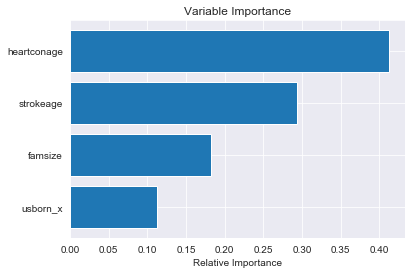

{'usborn_x': 0.11269272574411779, 'strokeage': 0.2931740194255087, 'famsize': 0.18169204233011385, 'heartconage': 0.4124412125002598}
[0.11269273 0.29317402 0.18169204 0.41244121]


In [883]:
generate_best_features(df_train, ["usborn_x", "strokeage", "famsize", 'heartconage'], 'exptot')



In [846]:
df_train['time_y'].head()

,time_y,time_y,time_y
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [845]:
(df_train.dtypes)

obtotvis                  int64
obphvis                   int64
obnphvis                  int64
obchivis                  int64
obnpvis                   int64
oboptvis                  int64
obpavis                   int64
obthvis                   int64
obchgtot                  int64
obphchtot                 int64
obnphchtot                int64
obchichtot                int64
obnpchtot                 int64
oboptchtot                int64
obpachtot                 int64
obthchtot                 int64
optotvis                  int64
opphvis                   int64
opnphvis                  int64
opchgtot                  int64
opfchgt                   int64
opprchgt                  int64
opphfcht                  int64
opphprchgt                int64
opnphfcht                 int64
opnphprchgt               int64
amchivis                  int64
amnpvis                   int64
amoptvis                  int64
ampavis                   int64
                         ...   
problems

In [829]:
a

['mepsid',
 'famsze',
 'age',
 'sex',
 'marstat',
 'regionmeps',
 'famsize',
 'racea',
 'yrsinus',
 'hispyn',
 'usborn_x',
 'educ',
 'educyr',
 'student',
 'workev',
 'inctot',
 'cpi2009',
 'ftotval',
 'povcat',
 'filestatus',
 'health',
 'accesselig',
 'usualpl',
 'nouslydkwher',
 'nouslydrmov',
 'nouslyfar',
 'nouslylang',
 'nouslynolike',
 'nouslynoneed',
 'nouslyoth',
 'uscmedtyp',
 'uscprtyp',
 'uscprnew',
 'uscprongng',
 'uscprprev',
 'uscprrefrl',
 'uscprasn',
 'uscprblk',
 'uscprhisp',
 'uscprnatam',
 'uscpropi',
 'uscprothrac',
 'uscprwht',
 'uscprsex',
 'usctrvltim',
 'uscprngtwkd',
 'uscprlang',
 'uscprexpln',
 'uscprothcare',
 'whynouslpl',
 'nouslyer',
 'nouslydiff',
 'nouslydr',
 'nouslyexp',
 'nouslyfrfam',
 'nouslyhlth',
 'nouslyinchg',
 'nouslyinrsn',
 'nouslyjob',
 'nouslymove',
 'nouslynoins',
 'nouslynone',
 'nouslyrefdr',
 'nouslyself',
 'nouslytrans',
 'nouslywork',
 'delaymc',
 'delaydt',
 'delayrx',
 'unmtndmc',
 'unmtnddt',
 'unmtndrx',
 'hiprivate',
 'hichampa

In [809]:
df_train1 = df_train[vars_filter1]

KeyError: "['year'] not in index"

In [756]:
#return_index(df_train.columns.tolist(), 'train_test'
for element in df_train.columns.tolist() [:214]:
    if 'age' in element:
        print(element)

age
strokeage
hypertenage
cheartdiage
angipecage
heartattage
heartconage
emphysemage
cholhighage
arthglupage
asthmaage
addage
diabeticage


In [751]:
recoded_vars = ['racea', 'hispyn', 'educyr', 'student', 'usborn', 'povcat', 'health', 'usualpl', 'uscprtyp', 
                'usctrvltim', 'sex', 'marstat', 'workev', 'filestatus', 'accesselig', 'workev']



In [674]:
'obtotvis' in (df_train.columns.values.tolist())

True

In [667]:
list_of_final_vars = (df_train.columns.values.tolist())

In [678]:
def return_index(lista, var):
    for index, element in enumerate(lista):
        if element==var:
            return index

In [684]:
return_index(list_of_final_vars, 'sexcateg')

236

In [687]:
created_vars = list_of_final_vars[236:]

In [690]:
final_list_of_vars = created_vars + to_keep

In [691]:
final_list_of_vars

['sexcateg',
 'male',
 'marital_st',
 'Married_x',
 'NIU_married_x',
 'Never married_x',
 'Separated_x',
 'Unknownmarstat_x',
 'Widowed_x',
 'Married_y',
 'NIU_married_y',
 'Never married_y',
 'Separated_y',
 'Unknownmarstat_y',
 'Widowed_y',
 'race_recoded',
 'black',
 'multiple',
 'native_american',
 'white',
 'hispanic_recoded',
 'not_hispanic',
 'school_recoded',
 'dn_educ',
 'school_grades912',
 'school_lessg8',
 'student_recoded',
 'is_student',
 'not_student',
 'has_worked_x',
 'has_worked_y',
 'unk_work',
 'usborn_recoded',
 'usborn_y',
 'poor_recoded',
 'not_poor',
 'file_tax',
 'tax_ingle',
 'tax_married_joint',
 'tax_married_separately',
 'tax_no_info',
 'tax_widower_dep',
 'health_recoded',
 'good_health',
 'usual_place',
 'usual_pl_y',
 'usualpl_n',
 'nouslydkwher_recod',
 'nouslydkwher_Y',
 'nouslydkwher_other_answ',
 'nouslydrmov_recod',
 'nouslydrmov_Y',
 'nouslydrmov_other_answ',
 'nouslyfar_recod',
 'nouslyfar_Y',
 'nouslyfar_other_answ',
 'nouslylang_recod',
 'nously

In [689]:
vars_to_keep=['obtotvis',
 'obphvis',
 'obnphvis',
 'obchivis',
 'obnpvis',
 'oboptvis',
 'obpavis',
 'obthvis',
 'obchgtot',
 'obphchtot',
 'obnphchtot',
 'obchichtot',
 'obnpchtot',
 'oboptchtot',
 'obpachtot',
 'obthchtot',
 'optotvis',
 'opphvis',
 'opnphvis',
 'opchgtot',
 'opfchgt',
 'opprchgt',
 'opphfcht',
 'opphprchgt',
 'opnphfcht',
 'opnphprchgt',
 'amchivis',
 'amnpvis',
 'amoptvis',
 'ampavis',
 'amthvis',
 'amtotdtcl',
 'amtotphcl',
 'amchichtot',
 'amnpchtot',
 'amoptchtot',
 'ampachtot',
 'amthchtot',
 'ertotvis',
 'erchgtot',
 'erfchgt',
 'erprchgt',
 'zntotvis',
 'hptotdis',
 'hptotnight',
 'znfcht',
 'znprcht',
 'hpchgtot',
 'hpfcht',
 'hpprcht',
 'dvchgtot',
 'dvgchtot',
 'dvochtot',
 'hhdays',
 'hhagdays',
 'hhsedays',
 'hhunpdays',
 'hhagchtot',
 'hhsechtot',
 'rxprmedsno',
 'vschgtot',
 'oechgtot', 'mepsid', "usborn_x", "strokeage", 
         "year", "famsize","chgtot", 'exptot', 'dvtotvis', 'dvgtotvis', 'dvototvis']

In [741]:
# for index, element in enumerate (list_of_final_vars[:100]): # '
#     print (element, index)

adinsa_recod
adinsb_recod
adrisk_recod
adover_recod
adcmpm_recod


In [517]:
impute(df_train, ['strokeage_recoded'])

In [526]:
df_train.k6sum.unique()

array([96, 98,  5,  0,  1,  3, 12, 19, 11,  2,  7,  6,  4, 18, 17, 10, 20,
        9, 13, 14,  8, 16, 24, 15, 21, 22, 23])

In [276]:
recode_categorical(df_train, 'sex','sexcateg',gen_ord_map)
# df_train = merge_dummies(df_train, create_dummiesdf(df_train,'sexcateg'))

In [310]:
sum((df_train['famsize']==0) )

0

In [419]:
var=str.lower("POVCAT")
df_test[var].unique()

array([5, 1, 4, 3, 2])

In [293]:
#'sexcateg' in list(df_train.columns)
df_train.head()

,Unnamed: 0,year,serial,pernum,duid,pid,mepsid,panel,psuann,stratann,...,phq2,adinsa,adinsb,adrisk,adover,adcmpm,adcmpy,adlang,train_test,sexcateg
0,1,2013,1,3,20004,103,2000410317,17,1,1109,...,96,0,0,0,0,96,9996,0,train,male
1,2,2013,2,1,20005,101,2000510117,17,2,1109,...,4,1,1,3,1,6,2013,2,train,female
2,3,2013,2,2,20005,102,2000510217,17,2,1109,...,1,1,3,3,1,6,2013,2,train,female
3,4,2013,2,3,20005,103,2000510317,17,2,1109,...,0,1,1,1,1,6,2013,2,train,female
4,5,2013,3,1,20006,101,2000610117,17,2,1045,...,0,1,1,1,1,8,2013,1,train,female


In [418]:
print(str.lower("HISPETH"))

povcat


In [243]:
test_dummy = create_dummiesdf(df_train, 'sex')

In [245]:
test_dummy.head()

,1,2
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [235]:
var=str.lower("REGIONMEPS")
df_train[var].unique()

array([3, 1, 2, 4, 0])

In [194]:
list_of_vars = list(df_train.columns)
list_of_vars_test = list(df_test.columns)

In [195]:
'exptot' in list_of_vars_test

False

In [186]:
list_of_vars[40:60]

['sex',
 'marstat',
 'birthmo',
 'birthyr',
 'regionmeps',
 'relate',
 'famsize',
 'racea',
 'hispeth',
 'yrsinus',
 'hispyn',
 'usborn',
 'intervlang',
 'othlangfam',
 'othlangspan',
 'othlangwell',
 'educ',
 'educyr',
 'eduyrdg',
 'edrecode']

In [132]:



#recode hispyn, usborn





True

'ad'

In [237]:
var=str.lower("YRSINUS")
df_train[var].unique()

array([0, 5, 4, 2, 3, 8, 7, 1, 9])

In [30]:
for var in list_of_vars:
    if (df_train[var].dtype) == str:
        print('string')

In [76]:
missing_values = pd.DataFrame(df_train.isnull().sum()/len(df_train)*100)

In [77]:
missing_values.reset_index(level=0, inplace=True)


In [80]:
missing_values.columns = ['var','perc_miss']
missing_values.head()

,var,perc_miss
0,Unnamed: 0,0.0
1,year,0.0
2,serial,0.0
3,pernum,0.0
4,duid,0.0


In [94]:
def impute(df, variables):
    '''Imputes values to the mean of a variable
    Inputs:
        df: dataframe
        variables: list of variables which will be imputed
    Returns:
        dataframe without nulls
    '''
    for variable in variables:
        df[variable].fillna(df[variable].mean(), inplace=True)
    

In [90]:
list_of_missings=[]
list_of_tuples=[]
for i,j in missing_values.iterrows():
    if j['perc_miss']>0:
        list_of_tuples.append((j['var'],j['perc_miss']))
        list_of_missings.append(j['var'])


In [95]:
impute(df_train, list_of_missings)

In [101]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
iris = load_iris()
#X, y = iris.data, iris.target

In [104]:
type(iris)

sklearn.utils.Bunch

In [33]:
X, y = fetch_data('195_auto_price', return_X_y=True)

feature_names = (
    fetch_data('195_auto_price', return_X_y=False)
    .drop(labels="target", axis=1)
    .columns
)
feature_names

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg'],
      dtype='object')

In [159]:
df_train['person_id'] = df_train.duid.astype(str) + df_train.pid.astype(str)


In [128]:
df_train.head()

,Unnamed: 0,year,serial,pernum,duid,pid,mepsid,panel,psuann,stratann,...,phq2,adinsa,adinsb,adrisk,adover,adcmpm,adcmpy,adlang,train_test,person_id
0,1,2013,1,3,20004,103,2000410317,17,1,1109,...,96,0,0,0,0,96,9996,0,train,20004103
1,2,2013,2,1,20005,101,2000510117,17,2,1109,...,4,1,1,3,1,6,2013,2,train,20005101
2,3,2013,2,2,20005,102,2000510217,17,2,1109,...,1,1,3,3,1,6,2013,2,train,20005102
3,4,2013,2,3,20005,103,2000510317,17,2,1109,...,0,1,1,1,1,6,2013,2,train,20005103
4,5,2013,3,1,20006,101,2000610117,17,2,1045,...,0,1,1,1,1,8,2013,1,train,20006101


In [180]:
df_train['has_duplicate']=df_train.duplicated(subset=['mepsid'], keep=False )

In [184]:
a = df_train[df_train['has_duplicate']==True]
a.sort_values(by=['mepsid'])


,Unnamed: 0,year,serial,pernum,duid,pid,mepsid,panel,psuann,stratann,...,adinsa,adinsb,adrisk,adover,adcmpm,adcmpy,adlang,train_test,person_id,has_duplicate
14104,14105,2013,6505,2,40001,102,4000110218,18,2,1144,...,1,1,1,1,10,2013,1,train,40001102,True
27675,27676,2014,1,2,40001,102,4000110218,18,2,1144,...,1,2,1,1,8,2014,1,train,40001102,True
27676,27677,2014,1,3,40001,103,4000110318,18,2,1144,...,0,0,0,0,96,9996,0,train,40001103,True
14105,14106,2013,6505,3,40001,103,4000110318,18,2,1144,...,0,0,0,0,96,9996,0,train,40001103,True
14106,14107,2013,6505,4,40001,104,4000110418,18,2,1144,...,0,0,0,0,96,9996,0,train,40001104,True
27677,27678,2014,1,4,40001,104,4000110418,18,2,1144,...,0,0,0,0,96,9996,0,train,40001104,True
14107,14108,2013,6506,1,40002,101,4000210118,18,1,1097,...,3,3,4,4,7,2013,1,train,40002101,True
27678,27679,2014,2,1,40002,101,4000210118,18,1,1097,...,2,3,2,3,1,2015,1,train,40002101,True
27679,27680,2014,3,1,40004,101,4000410118,18,2,1056,...,1,1,3,1,7,2014,2,train,40004101,True
14108,14109,2013,6507,1,40004,101,4000410118,18,2,1056,...,3,3,3,1,8,2013,2,train,40004101,True


In [175]:
# a = df_train[df_train['has_duplicate']==True]
# a.sort_values(by=['mepsid'])
print(any(a['mepsid'].duplicated()))                     # <--- Prints True


False


In [140]:
df_train['person_id'] = df_train.person_id.astype(int) 
df_train.sort_values(by=['pernum', 'duid','pid'])
#df_train.filter(items=['mepsid', 'person_id'])

,Unnamed: 0,year,serial,pernum,duid,pid,mepsid,panel,psuann,stratann,...,phq2,adinsa,adinsb,adrisk,adover,adcmpm,adcmpy,adlang,train_test,person_id
80434,80435,2016,1,1,10001,101,1000110121,21,1,1021,...,0,1,2,3,3,3,2017,1,train,10001101
80437,80438,2016,2,1,10002,101,1000210121,21,1,1077,...,0,1,1,1,1,8,2016,1,train,10002101
80439,80440,2016,4,1,10005,101,1000510121,21,2,1012,...,0,1,1,2,1,10,2016,1,train,10005101
80442,80443,2016,5,1,10006,101,1000610121,21,1,1003,...,5,1,4,3,1,9,2016,1,train,10006101
80443,80444,2016,6,1,10008,101,1000810121,21,1,1142,...,98,8,8,8,8,98,9998,1,train,10008101
80450,80451,2016,7,1,10009,101,1000910121,21,1,1004,...,0,4,1,3,2,8,2016,1,train,10009101
80453,80454,2016,8,1,10010,101,1001010121,21,1,1008,...,0,1,5,5,1,7,2016,1,train,10010101
80455,80456,2016,10,1,10016,101,1001610121,21,1,1144,...,98,8,8,8,8,98,9998,2,train,10016101
80461,80462,2016,13,1,10021,101,1002110121,21,1,1130,...,0,5,5,4,5,8,2016,1,train,10021101
80462,80463,2016,14,1,10022,101,1002210121,21,1,1018,...,0,1,3,1,1,8,2016,1,train,10022101


In [136]:
def generate_best_features(df,features, dep_var):
    '''
    Creates a barplot to show the better predictors
    Inputs:
        df: dataframe
        features (list): features that will be evaluated
        dep_var (string): variable of interest
    '''
    features = np.array(features)
    clf = RandomForestClassifier()
    clf.fit(df[features], df[dep_var])
    importances = clf.feature_importances_
    sorted_idx = np.argsort(importances)
    padding = np.arange(len(features)) + 0.5
    pl.barh(padding, importances[sorted_idx], align='center')
    pl.yticks(padding, features[sorted_idx])
    pl.xlabel("Relative Importance")
    pl.title("Variable Importance")
    pl.show()
    return list(importantes[sorted_idx])

0    duid    20004\npid       103\nName: 0, dtype: ...
1    duid    20005\npid       101\nName: 1, dtype: ...
2    duid    20005\npid       102\nName: 2, dtype: ...
3    duid    20005\npid       103\nName: 3, dtype: ...
4    duid    20006\npid       101\nName: 4, dtype: ...
Name: person_id, dtype: object

In [105]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
train_transformed = ohe.fit_transform(df_train)
train_transformed

ValueError: could not convert string to float: 'train'

In [46]:
class PipelineRFE(Pipeline):

    def fit(self, X, y=None, **fit_params):
        super(PipelineRFE, self).fit(X, y, **fit_params)
        self.feature_importances_ = self.steps[-1][-1].feature_importances_
        return self

pipe = PipelineRFE(
    [
        ('std_scaler', preprocessing.StandardScaler()),
        ("ET", ExtraTreesRegressor(random_state=42, n_estimators=250))
    ]
)

# Sets RNG seed to reproduce results (your results should match mine)
_ = StratifiedKFold(random_state=42)

feature_selector_cv = feature_selection.RFECV(pipe, cv=10, step=1, scoring="neg_mean_squared_error")
feature_selector_cv.fit(X, y)

RFECV(cv=10,
   estimator=PipelineRFE(memory=None,
      steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ET', ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity...stimators=250, n_jobs=1,
          oob_score=False, random_state=42, verbose=0, warm_start=False))]),
   n_jobs=1, scoring='neg_mean_squared_error', step=1, verbose=0)

In [43]:
class PipelineRFE(Pipeline):

    def fit(self, X, y=None, **fit_params):
        super(PipelineRFE, self).fit(X, y, **fit_params)
        self.feature_importances_ = self.steps[-1][-1].feature_importances_
        return self

In [44]:
pipe = PipelineRFE(
    [
        ('std_scaler', preprocessing.StandardScaler()),
        ("ET", ExtraTreesRegressor(random_state=42, n_estimators=250))
    ]
)

# Sets RNG seed to reproduce results (your results should match mine)
_ = StratifiedKFold(random_state=42)

feature_selector_cv = feature_selection.RFECV(pipe, cv=10, step=1, scoring="neg_mean_squared_error")
feature_selector_cv.fit(X, y)

feature_selector_cv.n_features_
# 9

9

In [45]:
cv_grid_rmse = np.sqrt(-feature_selector_cv.grid_scores_)
cv_grid_rmse

array([2981.48089461, 2681.34632497, 2468.32368972, 2402.74458326,
       2313.48908854, 2314.93752784, 2353.19070845, 2401.63239588,
       2253.1618682 , 2365.70835985, 2462.56697442, 2475.59320584,
       2436.7582986 , 2418.22783946, 2440.94259292])